In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')
 !ls -l /content/drive/'My Drive'

Mounted at /content/drive
total 285824
-rw------- 1 root root   3535685 Nov 14  2022  Assignment2_base_final.ipynb
-rw------- 1 root root   3822668 Aug 13  2021  atlas_2mm_1001_3.nii.gz
-rw------- 1 root root       178 Mar 22 04:35 'brief introduction.gdoc'
-rw------- 1 root root   1505899 Dec  2  2022 'button to control LED.mp4'
drwx------ 2 root root      4096 Apr  4  2023 'Colab Notebooks'
drwx------ 2 root root      4096 Apr  4  2023  Colab_Notebooks
-rw------- 1 root root    148770 Aug  8 23:43 'Copy of BME_DataLong.xlsx'
-rw------- 1 root root       178 Jan 21  2024 'Copy of grid_data (1).gsheet'
-rw------- 1 root root       178 Jan 21  2024 'Copy of grid_data (2).gsheet'
-rw------- 1 root root       178 Jun 28 16:56 'Copy of grid_data.gsheet'
-rw------- 1 root root       178 Jul 16 00:45 'Copy of IO MEPs DataLong.gsheet'
-rw------- 1 root root   1409572 Dec  2  2022 'dog-button control.mp4'
-rw------- 1 root root   2892896 Dec  2  2022 'dog-motor control.mp4'
-rw------- 1 root r

In [ ]:
from google.colab import auth
import numpy as np
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1jtTnBFSSUd1pcAHOymP56H3dNtzdo8-ERoJbszs7eGg/edit?gid=955975912#gid=955975912')
sheets = gsheets.worksheet('Sheet1').get_all_values()
df = pd.DataFrame(sheets[1:], columns=sheets[0])

In [ ]:
value = df['MEP']
value = value.astype(float)


(array([249., 489., 694., 484., 268., 301., 253., 543., 403., 250.]),
 array([   0. ,  202.7,  405.4,  608.1,  810.8, 1013.5, 1216.2, 1418.9,
        1621.6, 1824.3, 2027. ]),
 <BarContainer object of 10 artists>)

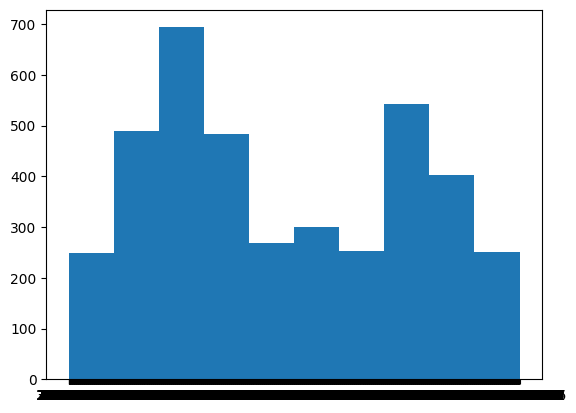

In [ ]:
plt.hist(df['MEP'])

In [ ]:
import math
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
subject = ['BME-01','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
num_subject = np.size(subject)
ttest = np.zeros((5,5,22))
median_value = np.zeros(22)
median_value1 = np.zeros(22)
median_value2 = np.zeros(22)
median_value3 = np.zeros(22)
median_value4 = np.zeros(22)
for a in range(num_subject):

  sub1 = df[df['Subj_ID']==subject[a]]['MEP']
  sub1 = sub1.astype(float)
  sub1 = np.array([math.log(X) for X in sub1])
  num_sub = np.zeros((5))

  ar = ['Baseline','Post0','Post10','Post20','Post30']
  for i in range(5):
    tmp = df[df['Subj_ID']==subject[a]]['Time']
    num_sub[i] = np.sum(tmp == ar[i])
    num_sub = num_sub.astype(int)

  Baseline_array = sub1[0:num_sub[0]]
  Post0_array = sub1[num_sub[0]:num_sub[0]+num_sub[1]]
  Post10_array = sub1[num_sub[0]+num_sub[1]:num_sub[0]+num_sub[1]+num_sub[2]]
  Post20_array = sub1[num_sub[0]+num_sub[1]+num_sub[2]:num_sub[0]+num_sub[1]+num_sub[2]+num_sub[3]]
  Post30_array = sub1[num_sub[0]+num_sub[1]+num_sub[2]+num_sub[3]:num_sub[0]+num_sub[1]+num_sub[2]+num_sub[3]+num_sub[4]]

  median = np.median(Baseline_array)
  median1 = np.median(Post0_array)
  median2 = np.median(Post10_array)
  median3 = np.median(Post20_array)
  median4 = np.median(Post30_array)
  Baseline_normalize = Baseline_array/median
  Post0_normalize = Post0_array/median
  Post10_normalize = Post10_array/median
  Post20_normalize = Post20_array/median
  Post30_normalize = Post30_array/median

  num_sub[0] = np.size(Baseline_normalize)
  num_sub[1] = np.size(Post0_normalize)
  num_sub[2] = np.size(Post10_normalize)
  num_sub[3] = np.size(Post20_normalize)
  num_sub[4] = np.size(Post30_normalize)
  median_value[a] = np.exp(median)
  median_value1[a] = np.exp(median1)
  median_value2[a] = np.exp(median2)
  median_value3[a] = np.exp(median3)
  median_value4[a] = np.exp(median4)
  x_positions = np.array([1, 2, 3, 4, 5])
  x_labels = ['Baseline', 'Post0', 'Post10', 'Post20', 'Post30']
  plt.scatter(np.repeat(x_positions[0], num_sub[0]), Baseline_normalize, color='blue', label='Baseline', alpha=0.6)
  plt.scatter(np.repeat(x_positions[1], num_sub[1]), Post0_normalize, color='red', label='Baseline', alpha=0.6)
  plt.scatter(np.repeat(x_positions[2], num_sub[2]), Post10_normalize, color='green', label='Baseline', alpha=0.6)
  plt.scatter(np.repeat(x_positions[3], num_sub[3]), Post20_normalize, color='yellow', label='Baseline', alpha=0.6)
  plt.scatter(np.repeat(x_positions[4], num_sub[4]), Post30_normalize, color='purple', label='Baseline', alpha=0.6)
  y_value = np.zeros(5)
  y_value[0] = np.median(Baseline_normalize)
  y_value[1] = np.median(Post0_normalize)
  y_value[2] = np.median(Post10_normalize)
  y_value[3] = np.median(Post20_normalize)
  y_value[4] = np.median(Post30_normalize)
  groups = [Baseline_normalize, Post0_normalize, Post10_normalize, Post20_normalize, Post30_normalize]
  for m in range(5):
    for n in range(5):
      t_statistic, p_value = stats.ttest_ind(groups[m], groups[n])
      ttest[m,n,a] = p_value

  plt.plot(x_positions,y_value)
  plt.xticks(x_positions, x_labels)
  plt.xlabel('record label')
  plt.ylabel('normalized result')
  plt.title(subject[a])
  plt.savefig(f'/content/drive/My Drive/normalize result of MEP/normalize result of MEP {a+2:02d}.png')
  plt.clf()


<Figure size 640x480 with 0 Axes>

In [ ]:
import math
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations
subject = ['BME-01','BME-02','BME-03','BME-04','BME-05','BME-06','BME-07','BME-08','BME-10','BME-11','BME-13','BME-14','BME-15','BME-18','BME-20','BME-21','BME-22','BME-24','BME-25','BME-27','BME-28','BME-29']
num_subject = np.size(subject)
ttest = np.zeros((5,5,22))
median_value = np.zeros(22)
median_value1 = np.zeros(22)
median_value2 = np.zeros(22)
median_value3 = np.zeros(22)
median_value4 = np.zeros(22)
for a in range(num_subject):

  sub1 = df[df['Subj_ID']==subject[a]]['MEP']
  sub1 = sub1.astype(float)
  sub1 = np.array([math.log(X) for X in sub1])
  num_sub = np.zeros((5))

  ar = ['Baseline','Post0','Post10','Post20','Post30']
  for i in range(5):
    tmp = df[df['Subj_ID']==subject[a]]['Time']
    num_sub[i] = np.sum(tmp == ar[i])
    num_sub = num_sub.astype(int)

  Baseline_array = sub1[0:num_sub[0]]
  Post0_array = sub1[num_sub[0]:num_sub[0]+num_sub[1]]
  Post10_array = sub1[num_sub[0]+num_sub[1]:num_sub[0]+num_sub[1]+num_sub[2]]
  Post20_array = sub1[num_sub[0]+num_sub[1]+num_sub[2]:num_sub[0]+num_sub[1]+num_sub[2]+num_sub[3]]
  Post30_array = sub1[num_sub[0]+num_sub[1]+num_sub[2]+num_sub[3]:num_sub[0]+num_sub[1]+num_sub[2]+num_sub[3]+num_sub[4]]

  median = np.median(Baseline_array)
  median1 = np.median(Post0_array)
  median2 = np.median(Post10_array)
  median3 = np.median(Post20_array)
  median4 = np.median(Post30_array)
  Baseline_normalize = Baseline_array-median
  Post0_normalize = Post0_array-median
  Post10_normalize = Post10_array-median
  Post20_normalize = Post20_array-median
  Post30_normalize = Post30_array-median

  num_sub[0] = np.size(Baseline_normalize)
  num_sub[1] = np.size(Post0_normalize)
  num_sub[2] = np.size(Post10_normalize)
  num_sub[3] = np.size(Post20_normalize)
  num_sub[4] = np.size(Post30_normalize)
  median_value[a] = np.exp(median)
  median_value1[a] = np.exp(median1)
  median_value2[a] = np.exp(median2)
  median_value3[a] = np.exp(median3)
  median_value4[a] = np.exp(median4)
  x_positions = np.array([1, 2, 3, 4, 5])
  x_labels = ['Baseline', 'Post0', 'Post10', 'Post20', 'Post30']
  plt.scatter(np.repeat(x_positions[0], num_sub[0]), Baseline_normalize, color='blue', label='Baseline', alpha=0.6)
  plt.scatter(np.repeat(x_positions[1], num_sub[1]), Post0_normalize, color='red', label='Baseline', alpha=0.6)
  plt.scatter(np.repeat(x_positions[2], num_sub[2]), Post10_normalize, color='green', label='Baseline', alpha=0.6)
  plt.scatter(np.repeat(x_positions[3], num_sub[3]), Post20_normalize, color='yellow', label='Baseline', alpha=0.6)
  plt.scatter(np.repeat(x_positions[4], num_sub[4]), Post30_normalize, color='purple', label='Baseline', alpha=0.6)
  y_value = np.zeros(5)
  y_value[0] = np.median(Baseline_normalize)
  y_value[1] = np.median(Post0_normalize)
  y_value[2] = np.median(Post10_normalize)
  y_value[3] = np.median(Post20_normalize)
  y_value[4] = np.median(Post30_normalize)
  groups = [Baseline_normalize, Post0_normalize, Post10_normalize, Post20_normalize, Post30_normalize]
  for m in range(5):
    for n in range(5):
      t_statistic, p_value = stats.ttest_ind(groups[m], groups[n])
      ttest[m,n,a] = p_value

  plt.plot(x_positions,y_value)
  plt.xticks(x_positions, x_labels)
  plt.xlabel('record label')
  plt.ylabel('substract median of MEP baseline')
  plt.title(subject[a])
  plt.savefig(f'/content/drive/My Drive/normalize result of MEP/substract median result of MEP {a+2:02d}.png')
  plt.clf()


<Figure size 640x480 with 0 Axes>

In [ ]:

print(ttest[:,:,20])

[[1.         0.46930449 0.70802673 0.03689421 0.0046866 ]
 [0.46930449 1.         0.36119519 0.1761218  0.04612817]
 [0.70802673 0.36119519 1.         0.04592225 0.01068856]
 [0.03689421 0.1761218  0.04592225 1.         0.66139577]
 [0.0046866  0.04612817 0.01068856 0.66139577 1.        ]]


In [ ]:
import numpy as np
from scipy import stats
from itertools import combinations

# Sample data for five groups
group1 = np.array([23, 21, 19, 24, 30])
group2 = np.array([32, 30, 29, 35, 40])
group3 = np.array([20, 18, 22, 25, 24])
group4 = np.array([27, 29, 31, 30, 33])
group5 = np.array([22, 21, 20, 24, 26])

# List of groups
groups = [group1, group2, group3, group4, group5]
group_names = ['Group1', 'Group2', 'Group3', 'Group4', 'Group5']

# Perform pairwise t-tests
for (i, j) in combinations(range(len(groups)), 2):
    t_statistic, p_value = stats.ttest_ind(groups[i], groups[j])
    print(f"T-test between {group_names[i]} and {group_names[j]}:")
    print(f"  T-statistic: {t_statistic}")
    print(f"  P-value: {p_value}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("  Reject the null hypothesis: There is a significant difference between the two groups.")
    else:
        print("  Fail to reject the null hypothesis: No significant difference between the two groups.")
    print()


T-test between Group1 and Group2:
  T-statistic: -3.60255164825966
  P-value: 0.006956474929086051
  Reject the null hypothesis: There is a significant difference between the two groups.

T-test between Group1 and Group3:
  T-statistic: 0.7084919084320752
  P-value: 0.4987608388041668
  Fail to reject the null hypothesis: No significant difference between the two groups.

T-test between Group1 and Group4:
  T-statistic: -3.1251905771484982
  P-value: 0.014117495696561955
  Reject the null hypothesis: There is a significant difference between the two groups.

T-test between Group1 and Group5:
  T-statistic: 0.372193684159387
  P-value: 0.7194148201548822
  Fail to reject the null hypothesis: No significant difference between the two groups.

T-test between Group2 and Group3:
  T-statistic: 4.82600482600724
  P-value: 0.0013112891090484222
  Reject the null hypothesis: There is a significant difference between the two groups.

T-test between Group2 and Group4:
  T-statistic: 1.4397480661

([<matplotlib.axis.XTick at 0x78687c801c00>,
 [Text(1, 0, 'Baseline'),
  Text(2, 0, 'Post0'),
  Text(3, 0, 'Post10'),
  Text(4, 0, 'Post20'),
  Text(5, 0, 'Post30')])

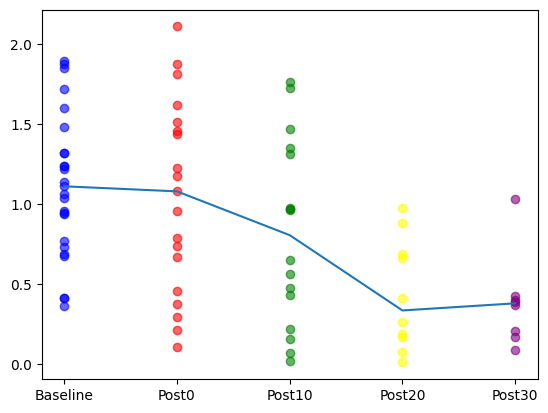

In [ ]:

x_positions = np.array([1, 2, 3, 4, 5])
x_labels = ['Baseline', 'Post0', 'Post10', 'Post20', 'Post30']
plt.scatter(np.repeat(x_positions[0], num_sub[0]), Baseline_normalize, color='blue', label='Baseline', alpha=0.6)
plt.scatter(np.repeat(x_positions[1], num_sub[1]), Post0_normalize, color='red', label='Baseline', alpha=0.6)
plt.scatter(np.repeat(x_positions[2], num_sub[2]), Post10_normalize, color='green', label='Baseline', alpha=0.6)
plt.scatter(np.repeat(x_positions[3], num_sub[3]), Post20_normalize, color='yellow', label='Baseline', alpha=0.6)
plt.scatter(np.repeat(x_positions[4], num_sub[4]), Post30_normalize, color='purple', label='Baseline', alpha=0.6)
y_value = np.zeros(5)
y_value[0] = np.median(Baseline_normalize)
y_value[1] = np.median(Post0_normalize)
y_value[2] = np.median(Post10_normalize)
y_value[3] = np.median(Post20_normalize)
y_value[4] = np.median(Post30_normalize)
plt.plot(x_positions,y_value)
plt.xticks(x_positions, x_labels)
